
<br />
<center>
    <img src="images/friends-cast.jpg" width=1400 height=700 />
</center>

## Notebook Contents:
- Adding packages and importing various libraries
- Loading **FRIENDS TV series** (a famous television sitcom comedy series) dataset and cleaning it using NLTK techniques
- Plotting various attributes of characters in FRIENDS TV series
- Modelling and applied supervised and unsupervised learning methods
- Conclusion

<a id='section1'></a>

### **Importing various python libraries that are required for our notebook at various steps.**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
from nltk.book import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob, Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.probability import ConditionalFreqDist
import random

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Data Cleaning:
Our dataset is in excel format. We load it using **pandas** read_excel function

In [3]:
df = pd.read_excel('data/friends_dataset.xlsx')

Our dataset looks like below. The columns are Location(where the scene happens), Scene(situation of the play), Season(there are 10 seasons and Season column has the number), Text(dialogue), Speaker(the character who is talking) and dialouge_count(length of the dialogue also the number of letters in the dialogue)

In [3]:
df.head()

,Unnamed: 0,Location,Scene,Season,Speaker,Text,dialogue_count
0,0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?,5.0
1,1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?",33.0
2,2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g...",51.0
3,3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.,5.0
4,4,Phoebe‚Äôs birthday,she‚Äôs telling everyone what she found out a...,7,Phoebe,Oh!,4.0


The below are the characters in FRIENDS TV show. We are initialising each character with an empty list

In [4]:
Rachel = []
Monica = []
Chandler = []
Ross = []
Joey = []
Phoebe = []

Based on the Speaker, we are loading each character list with the text or the dialogues that they are delivering in the episode.

In [5]:
for d in df.index:
    if df['Speaker'][d] == 'Ross':
        Ross.append(df['Text'][d])
    elif df['Speaker'][d] == 'Chandler':
        Chandler.append(df['Text'][d])
    elif df['Speaker'][d] == 'Phoebe':
        Phoebe.append(df['Text'][d])
    elif df['Speaker'][d] == 'Monica':
        Monica.append(df['Text'][d])
    elif df['Speaker'][d] == 'Joey':
        Joey.append(df['Text'][d])
    elif df['Speaker'][d] == 'Rachel':
        Rachel.append(df['Text'][d])

For example the list 'Ross' has all the dialogues that he has delivered in the 10 seasons of the show.
We still need to clean the data as the data has unexpected or special characters which will be cleaned in the next few lines of code

In [6]:
Ross

['Yeah.',
 ' Woohoo!',
 'I love this. ',
 "No, I'm sorry. Look I don't think that's what you wanna hear right now but I can't help it. I love marriage.",
 'I broke my thumb.',
 ' Dude, what are you doing?',
 ' Umm, uh, I was just telling the guys‚Ä¶',
 'Huh. That‚Äôs a really pretty name for-for an industrial solvent.',
 'Hey Rach, can you pass me the TV Guide?',
 '‚Ä¶and the miracle was that that little bit of oil that should‚Äôve just lasted just one day, burned for‚Ä¶',
 'Mary-Angela.',
 'Oww!',
 'What?',
 'Yeah.',
 'Beef in a dessert?! I- no no no, there is no way!',
 'Well I had a great time! Umm, Chancy on the other hand‚Ä¶',
 'Yeah.',
 'Uh, Pheebs, while we‚Äôre hovering around the subject. I just have to say dinosaurs, they-they don‚Äôt go, rrroof!',
 'All right.  ‚ÄòCandy and Cookie?‚Äô',
 'Ohh! Thank you.',
 "Emily's cousin kicked me out!",
 "It's an honor to meet you. I can't tell you how long I've been an admirer of your work, I mean, that Nobel prize,  whoooo! I mean, I ha

We are printing the number of dialogues delivered by each characters in all the episodes of 10 seasons

In [7]:
print(len(Chandler), len(Monica), len(Joey), len(Ross), len(Phoebe), len(Rachel))

15389 15353 15235 16672 13628 17058


Since there are many empty rows and integers at some part of the columns we are going to remove the integers and float datatypes of cells and nan and just have only the sentences

In [8]:
Ross = [w for w in Ross if str(w) != 'nan']
Ross = [w for w in Ross if type(w) != float]
Ross = [w for w in Ross if type(w) != int]

Rachel = [w for w in Rachel if str(w) != 'nan']
Rachel = [w for w in Rachel if type(w) != float]
Rachel = [w for w in Rachel if type(w) != int]

Chandler = [w for w in Chandler if str(w) != 'nan']
Chandler = [w for w in Chandler if type(w) != float]
Chandler = [w for w in Chandler if type(w) != int]

Joey = [w for w in Joey if str(w) != 'nan']
Joey = [w for w in Joey if type(w) != float]
Joey = [w for w in Joey if type(w) != int]

Monica = [w for w in Monica if str(w) != 'nan']
Monica = [w for w in Monica if type(w) != float]
Monica = [w for w in Monica if type(w) != int]

Phoebe = [w for w in Phoebe if str(w) != 'nan']
Phoebe = [w for w in Phoebe if type(w) != float]
Phoebe = [w for w in Phoebe if type(w) != int]

We are defining a function wherein it cleans the special characters, punctuations and just extract the words in the text of Ross.
- Firstly, we remove the special characters by replacing them with blank spaces using re.sub from regular expressions package.
- Secondly, we tokenise each sentence in the Ross list using word_tokenize from nltk package
- Thirdly, we Stem the words using PorterStemmer(). Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.
- Finally, we Lemmatise the words list using WordNetLemmatizer(). Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [9]:
def get_words(text):
    """This function returns clean data. This function will take data from open file pointers and drop new line and tab characters.
    Convert all the characters to lowercase to minimize the vocabulary """
    words_list = []
    for s in text:
        s = re.sub('[^A-Za-z0-9]+', ' ', s)
        words_list = words_list + word_tokenize(s)
    for a in words_list:
        a = PorterStemmer().stem(a)
        a = WordNetLemmatizer().lemmatize(a,"v")
    return words_list

get_words(Ross) as defined from above will give us the word list of Ross dialogues which is later filtered for any stop words in english using nltk.corpus.stopwords.words(). If there are any stop words like aa,ummm,aaah,hm etc they will be removed from the list
So finally Ross vocabulary count is 4860

In [10]:
""" removes all the english stop words"""
Ross_words = get_words(Ross)        
stopwords = nltk.corpus.stopwords.words()
Ross_words = [w.lower() for w in Ross_words if w.isalnum() and w.lower() not in stopwords]
vocabulary = set(Ross_words)
len(vocabulary)

4860

### Parts of Speeching(POS) tagging:
The POS tagger in the NLTK library outputs specific tags for certain words. The .pos_tag() function needs to be passed a tokenized text for tagging.
For example,  
- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective ‘big’
- JJR adjective, comparative ‘bigger’ etc.,

In [11]:
"""Tagging the list of noun,pronoun,verbs,etc"""
nltk.pos_tag(Ross_words)

[('yeah', 'NN'),
 ('woohoo', 'WRB'),
 ('love', 'NN'),
 ('sorry', 'NN'),
 ('look', 'NN'),
 ('think', 'VBP'),
 ('wan', 'IN'),
 ('hear', 'NN'),
 ('right', 'RB'),
 ('help', 'VB'),
 ('love', 'VB'),
 ('marriage', 'NN'),
 ('broke', 'VBD'),
 ('thumb', 'JJ'),
 ('dude', 'NN'),
 ('umm', 'JJ'),
 ('uh', 'UH'),
 ('telling', 'VBG'),
 ('guys', 'NNS'),
 ('huh', 'VBP'),
 ('really', 'RB'),
 ('pretty', 'JJ'),
 ('industrial', 'JJ'),
 ('solvent', 'NN'),
 ('hey', 'NN'),
 ('rach', 'VBP'),
 ('pass', 'NN'),
 ('tv', 'NN'),
 ('guide', 'NN'),
 ('miracle', 'NN'),
 ('little', 'JJ'),
 ('bit', 'NN'),
 ('oil', 'NN'),
 ('lasted', 'VBN'),
 ('day', 'NN'),
 ('burned', 'VBD'),
 ('mary', 'JJ'),
 ('angela', 'NN'),
 ('oww', 'NN'),
 ('yeah', 'NN'),
 ('beef', 'NN'),
 ('dessert', 'JJ'),
 ('way', 'NN'),
 ('well', 'RB'),
 ('great', 'JJ'),
 ('time', 'NN'),
 ('umm', 'JJ'),
 ('chancy', 'NN'),
 ('hand', 'NN'),
 ('yeah', 'UH'),
 ('uh', 'JJ'),
 ('pheebs', 'JJ'),
 ('hovering', 'VBG'),
 ('around', 'IN'),
 ('subject', 'JJ'),
 ('say', 'VBP')

The below code runs the **Frequency Distribution** of the words in the Ross' vocabulary

In [12]:
fdist = FreqDist(Ross_words)
fdist.most_common(30)

[('know', 1830),
 ('oh', 1697),
 ('okay', 1544),
 ('yeah', 1490),
 ('hey', 1348),
 ('uh', 1260),
 ('well', 991),
 ('right', 878),
 ('like', 737),
 ('mean', 696),
 ('gon', 686),
 ('go', 680),
 ('get', 664),
 ('think', 644),
 ('really', 638),
 ('look', 601),
 ('got', 564),
 ('see', 489),
 ('going', 462),
 ('guys', 459),
 ('rachel', 427),
 ('good', 424),
 ('would', 398),
 ('sorry', 372),
 ('great', 366),
 ('yes', 338),
 ('joey', 332),
 ('huh', 324),
 ('time', 317),
 ('hi', 314)]

Frequenct Distribution plot is as follows:

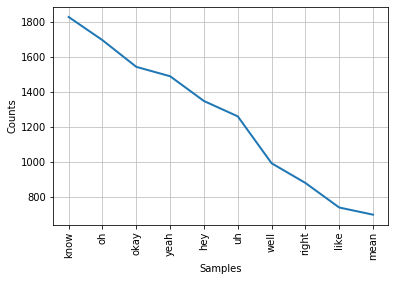

In [13]:
FreqDist(Ross_words).plot(10, cumulative = False)

To find the **conditional probability** or the probability of a word coming in a list is done by ConditionalFreqDist() function. For example, conditional probability of Ross using Hi! word is 18% or approximately 0.18

In [14]:
"""Conditional Probability"""
cfdist = ConditionalFreqDist((len(word), word) for word in Ross)
cfdist[3].freq('Hi!')

0.1821705426356589

Finding the place where the characters in the show hangout, we plot the frequency distribution of various locations in the dataset and **Central Perk** is obviously their first choice

<FreqDist with 744 samples and 93335 outcomes>


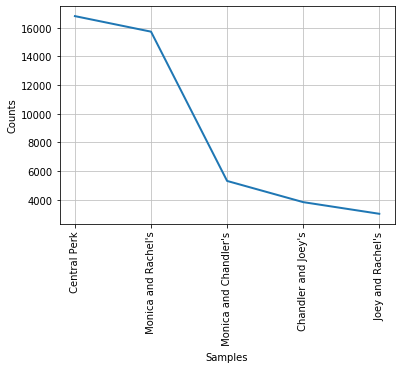

In [15]:
locations = []
for row in df.Location:
    locations.append(row)
freqdist = FreqDist(locations)
print(freqdist)
freqdist.plot(5)

To find who delivered most dialogues in the show we use Frequency distribution Plot of Speaker column and it's the most talkative **Rachel**

<FreqDist with 6 samples and 93335 outcomes>


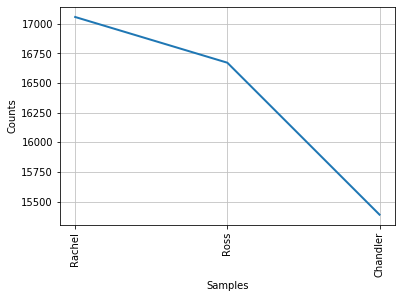

In [16]:
dialogues = []
type(dialogues)
for d in df['Speaker']:
    dialogues.append(d)
freqdist_d = FreqDist(dialogues)
print(freqdist_d)
freqdist_d.plot(3)

We will go ahead and find who delivered most Dialogues in each season we use the seaborn line plot with categories.

Text(0, 0.5, '')

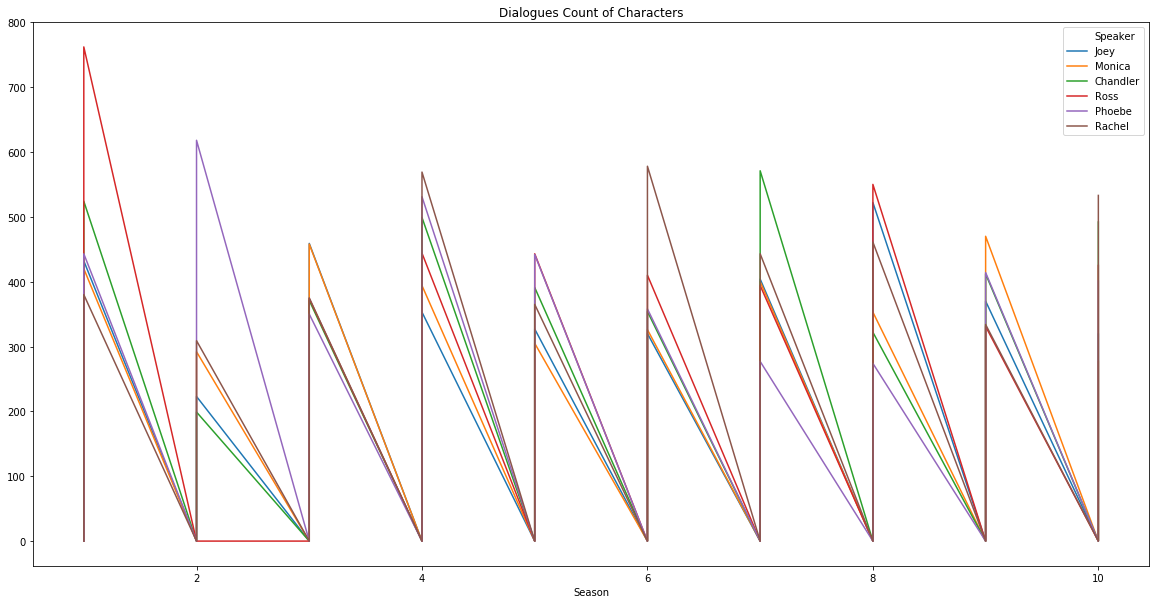

In [17]:
plt.figure(figsize=(20,10))
dc = sns.lineplot(x="Season", y="dialogue_count", hue="Speaker", estimator =None, data=df,palette=None)
dc.set_title("Dialogues Count of Characters")
dc.set_ylabel('')

Finding the **lexical diversity** of words which means in a simple way, on an average, how many times a word is repeated in the Ross dialogue list.

In [18]:
def lexical_diversity(doc):
    return len(doc)/len(set(doc))

lexical_diversity(Ross_words)

15.283950617283951

###### Lexical Dispersion Plot of random 5 words used by Ross

In [19]:
words_ross = list(FreqDist(Ross_words).keys())
random_words = random.choices(words_ross, k=5)
random_words

['gross', 'rebuild', 'theorem', 'dialing', '27']

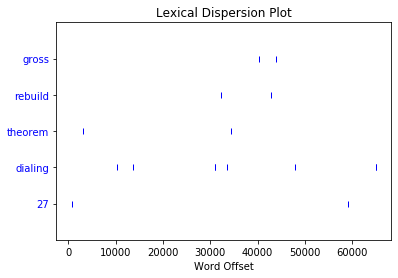

In [20]:
nltk.Text(Ross_words).dispersion_plot(random_words)

### **Sentiment analysis** of dialogues by characters

Defining a function which finds the polarity of a sentence (greater than zero means positive else it's negative). It ranges from -1 to 1.

In [21]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [22]:
df.Text = df.Text.apply(str)

Initialising a new column in our dataframe which is sentiment, the value of polarity

In [23]:
df['sentiment'] = df.Text.apply(detect_sentiment)

In [24]:
df['sentiment']

0        0.000000
1        0.200000
2        1.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8       -1.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.200000
14       0.500000
15       0.345238
16       0.000000
17       0.000000
18       0.156250
19       0.000000
20       0.250000
21       0.285714
22       0.000000
23      -0.500000
24       0.000000
25       0.625000
26       0.000000
27       1.000000
28       0.000000
29       0.000000
           ...   
93305    0.000000
93306    0.500000
93307    0.000000
93308   -0.051852
93309    0.625000
93310    0.050000
93311    0.000000
93312    0.000000
93313    0.625000
93314    0.000000
93315    0.000000
93316    0.000000
93317    0.080357
93318    0.000000
93319    0.463128
93320    0.412500
93321    0.000000
93322    0.000000
93323    0.312500
93324   -0.071429
93325    0.000000
93326    0.000000
93327    0.000000
93328   -0.400000
93329    0

The concentration of values in sentiment column is shown by a box plot.

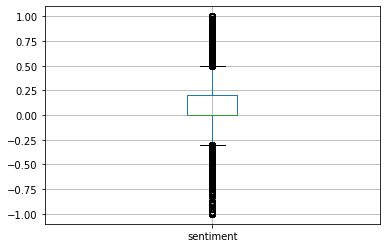

In [25]:
df.boxplot(column = 'sentiment')

More positive sentimental dialogue is:

In [26]:
df[df.sentiment > 0.75].Text.head(10)

2      Phoebe is going to say "yes"? That's, that's g...
27                                  This stuff is great!
101    Me too. Yeah, this place is great. I'm so happ...
116                                  Now I‚Äôm so happy.
207    Well, I have a girlfriend, I‚Äôm-I‚Äôm happy. ...
208                                           Good call!
242    Okay! Okay! Okay! You win! You win!! I can't h...
278                             I am extremely talented!
280                    Ross, you're like my best friend.
480                                        That's great.
Name: Text, dtype: object

More negative sentimental dialogue is:

In [27]:
df[df.sentiment < -0.25].Text.head(10)

8                                 What? That's terrible!
23     It's so weird seeing Ross and Rachel with a ba...
34      She doesn‚Äôt want her parents to know she‚Äô...
110    It's an honor to meet you. I can't tell you ho...
118    Nothing! You have apologized to her like a mil...
123    Listen umm, I‚Äôve been thinking, it‚Äôs not f...
155    Are you kidding? I have had some very dirty dr...
175    Oh! I knew it! I knew it! I felt really thick ...
233       Hey! It‚Äôs my fashion girls!  What‚Äôs wrong?
243    Oh, you want something serious. Y'know what yo...
Name: Text, dtype: object

Defining a new function which displays 'positive' and 'negative' based on left or right side of zero

In [28]:
def emotion_result(val):
    if val > 0:
        return 'positive'
    elif val <= 0:
        return 'negative'

A new column in our dataframe which displays the emotion result(positive or negative)

In [29]:
df['emotion'] = df.sentiment.apply(emotion_result)

### Modelling techniques on our dataset:

Adding features to a document matrix:

In [30]:
feature_cols = ['Text']

defining X and y for our modelling

In [31]:
X = df[feature_cols]
y = df.emotion
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Using **CountVectorizer** with text column in dataset

In [32]:
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.Text)
X_test_dtm = vect.transform(X_test.Text)
print((X_train_dtm.shape))
print((X_test_dtm.shape))

(70001, 12238)
(23334, 12238)


In [33]:
# Shape of feature column
X_train.drop('Text', axis=1).shape

(70001, 0)

In [34]:
# Casting feature columns to float and converting to a sparse matrix
import scipy as sp
extra = sp.sparse.csr_matrix(X_train.drop('Text', axis=1).astype(float))
extra.shape

(70001, 0)

In [35]:
# Combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(70001, 12238)

In [36]:
# repeating for testing dataset
extra = sp.sparse.csr_matrix(X_test.drop('Text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(23334, 12238)

In [37]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print((metrics.accuracy_score(y_test, y_pred_class)))

/Users/rani/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9766863803891317


In [38]:
# Use logistic regression with Text column
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9766863803891317


### Supervised learning

Importing TFIDF vectorizer

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tfidf

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [41]:
X = vectorizer.fit_transform(df.Text[0:int(len(df.Text)/3)])
X

<31111x9314 sparse matrix of type '<class 'numpy.int64'>'
	with 134199 stored elements in Compressed Sparse Row format>

Building weighted term documented matrix using the TFIDF vectorizer

In [42]:
X_weighted = tfidf.fit_transform(X)
X_weighted.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
# building the term-document matrix for the test set using the existing transforms

X_test = vectorizer.transform(df.Text[int(len(df.Text)/3)+1:])
X_test_weighted = tfidf.fit_transform(X_test)

In [44]:

# get the emotion for each text in both the train and test sets
train_labels = df.emotion[0:int(93335/3)]
test_labels = df.emotion[int(93335/3)+1:]

In [45]:
train_labels

0        negative
1        positive
2        positive
3        negative
4        negative
5        negative
6        negative
7        negative
8        negative
9        negative
10       negative
11       negative
12       negative
13       positive
14       positive
15       positive
16       negative
17       negative
18       positive
19       negative
20       positive
21       positive
22       negative
23       negative
24       negative
25       positive
26       negative
27       positive
28       negative
29       negative
           ...   
31081    positive
31082    positive
31083    negative
31084    positive
31085    negative
31086    positive
31087    positive
31088    positive
31089    negative
31090    negative
31091    positive
31092    negative
31093    negative
31094    negative
31095    negative
31096    negative
31097    negative
31098    negative
31099    negative
31100    negative
31101    negative
31102    negative
31103    negative
31104    positive
31105    n

Initialising y with postive if there is positive sentiment and negative if there is negative sentiment

In [46]:
y = np.asarray([1 if 'positive' in label else 0 for label in train_labels])
y_test = np.asarray([1 if 'positive' in label else 0 for label in test_labels])

In [47]:
X_weighted.shape, y.shape, X_test_weighted.shape, y_test.shape

((31111, 9314), (31111,), (62223, 9314), (62223,))

We're know to train a classifier with (multinomial) Naive Bayes.

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# train the classifier
classifier = MultinomialNB()
classifier.fit(X_weighted, y)

# predict labels for the test set
predictions = classifier.predict(X_test_weighted)

# output the classification report
label_names = ['negative', 'positive']
print("""Supervised Learning""")
print(classification_report(y_test, predictions, target_names=label_names))

Supervised Learning
              precision    recall  f1-score   support

    negative       0.85      0.98      0.91     41862
    positive       0.94      0.65      0.77     20361

    accuracy                           0.87     62223
   macro avg       0.89      0.81      0.84     62223
weighted avg       0.88      0.87      0.86     62223



Trying out the unsupervised learning but there are no satisfactory results because its usefulness is limited and we can't get good results out of non-negative matrix factorization (NMF) in Natural Language Processing.

In [49]:
print("""Unsupervised Learning""")
from sklearn.decomposition import NMF
nmf = NMF(n_components=10).fit(X_weighted)

feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print('Topic #%d:' % topic_idx)
    print(' '.join([feature_names[i] for i in topic.argsort()[:-20 - 1:-1]]))
    print('')

Unsupervised Learning
Topic #0:
yeah sure uh good like baby got maybe think mean äôre ll äôll great guess kinda gonna look totally love

Topic #1:
hey guys pheebs rach joey ross did chandler going uh doing look listen mon come phoebe monica audition remember äôd

Topic #2:
oh god thank good sorry great did ross uh come wait love look just guys thanks ok wow got want

Topic #3:
okay gonna just äôm äôll bye ready look phoebe good umm let wait sure tell äôre ross fine talk second

Topic #4:
nan did yes say tell uh just said ross thank hear happen wait didn thing ask rachel ok wow man

Topic #5:
know did don just mean like guys gonna maybe thing ok good does ross ve ll time didn feel think

Topic #6:
äôs really äôm just gonna going like great uh äôre let ross think joey mean äôknow good come look time

Topic #7:
hi äôm guys chandler monica honey pheebs sweetie phoebe come just ross emily joey excuse rach umm geller uh rachel

Topic #8:
right äôre just gonna let ll äôm äôll sorry tell look 

### Modelling using Gensim

In [50]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [51]:
from gensim import corpora, models, similarities, matutils

# creating the corpus using a conversion utility
gensim_corpus = matutils.Sparse2Corpus(X_weighted)

# building the Latent Dirichlet Allocation (LDA) model
lda = models.LdaModel(gensim_corpus, num_topics=100)
lda

Word2vec is an nsupervised neural network model that runs on a corpus of text and learns vector representations for the individual words in the text. The word vectors are modeled in a way such that words that are semantically close to each other are also close in the vector space, so neighbors in the vector space equates to similar semantics.

Let's explore some of the implications on our dataset. Since word2vec expects a list of sentences as input, we'll need to go back to the pre-transformed word list which we defined (Ross_words)

In [52]:
Ross_words

['yeah',
 'woohoo',
 'love',
 'sorry',
 'look',
 'think',
 'wan',
 'hear',
 'right',
 'help',
 'love',
 'marriage',
 'broke',
 'thumb',
 'dude',
 'umm',
 'uh',
 'telling',
 'guys',
 'huh',
 'really',
 'pretty',
 'industrial',
 'solvent',
 'hey',
 'rach',
 'pass',
 'tv',
 'guide',
 'miracle',
 'little',
 'bit',
 'oil',
 'lasted',
 'day',
 'burned',
 'mary',
 'angela',
 'oww',
 'yeah',
 'beef',
 'dessert',
 'way',
 'well',
 'great',
 'time',
 'umm',
 'chancy',
 'hand',
 'yeah',
 'uh',
 'pheebs',
 'hovering',
 'around',
 'subject',
 'say',
 'dinosaurs',
 'go',
 'rrroof',
 'right',
 'candy',
 'cookie',
 'ohh',
 'thank',
 'emily',
 'cousin',
 'kicked',
 'honor',
 'meet',
 'tell',
 'long',
 'admirer',
 'work',
 'mean',
 'nobel',
 'prize',
 'whoooo',
 'mean',
 'tell',
 'reasons',
 'got',
 'field',
 'oh',
 'great',
 'going',
 'saturday',
 'found',
 'seeing',
 'guy',
 'yeah',
 'know',
 'ah',
 'girlfriend',
 'told',
 'last',
 'night',
 'well',
 'turns',
 'ah',
 'wants',
 'get',
 'back',
 'togeth

In [53]:
model = models.Word2Vec([Ross_words], size=100, window=5, min_count=5, workers=4)

Since we're dealing with vectors, it's possible to compare words using vector math such as cosine similarity.

In [54]:
model.similarity('love', 'marriage')

/Users/rani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.99762356

Our model can also create the words that similar to given words

In [55]:
model.most_similar(positive=['love', 'marriage'], negative=['oil'])

/Users/rani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('dr', 0.979898989200592),
 ('dude', 0.9797899127006531),
 ('wait', 0.9796623587608337),
 ('happened', 0.9794272184371948),
 ('live', 0.9794021844863892),
 ('told', 0.9793737530708313),
 ('thought', 0.9793291687965393),
 ('called', 0.979302167892456),
 ('friend', 0.9792579412460327),
 ('hope', 0.9792065024375916)]

### using Principal Component Analysis (PCA) to plot and their semantic relation from our model

/Users/rani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


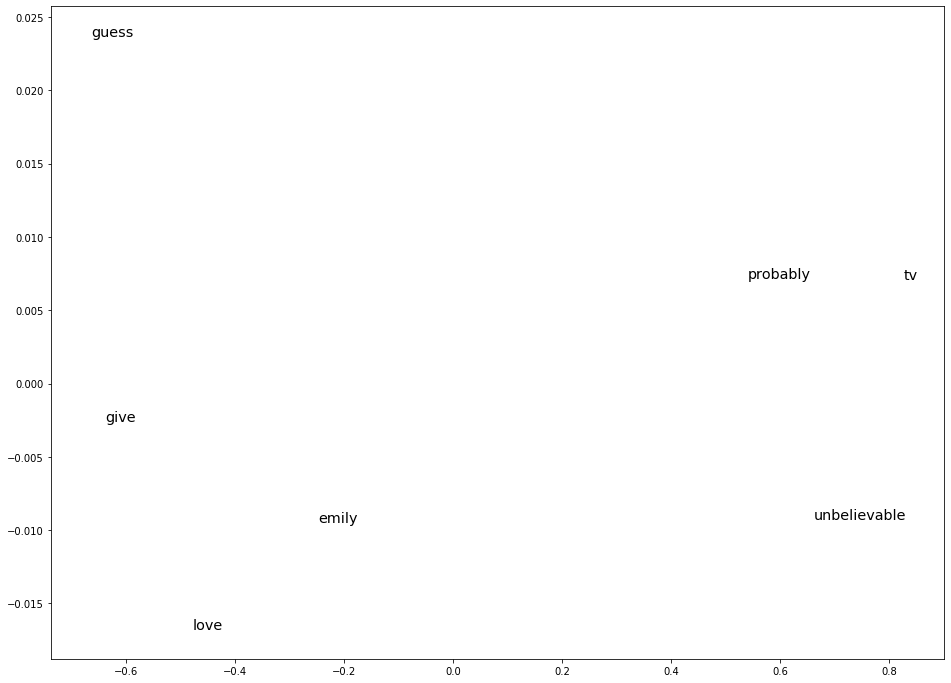

In [56]:
from sklearn.decomposition import PCA

words = ['tv', 'love', 'guess', 'emily', 'unbelievable', 'probably', 'give']
word_vectors = [model[word] for word in words]

# creating and applying PCA transform
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# slicing the 2D array
x = principal_components[:, 0]
y = principal_components[:, 1]

# ploting with text annotation
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(x, y, s=0)

for i, label in enumerate(words):
    ax.annotate(label, (x[i], y[i]), size='x-large')

### Conclusion:

The FRIENDS gave a lot of insights about doing sentiment analysis, plotting the attributes, and modelling the dataset for emotion and semantics of words.
We are Done! Thank You! Cheers!

<br />
<center>
    <img src="images/friends1.jpg" width=1000 height=700 />
</center>

End!